In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import subprocess
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [3]:
methods = ["CMM","WP"]
#Funcion auxiliar para correr experimentos
def correr_experimento(metodo, archivoEntrada, archivoSalida):
    result = subprocess.run([f"../../programaRankeo", f"{metodo}", f"{archivoEntrada}", f"{archivoSalida}"], stderr = subprocess.PIPE, encoding = 'ascii')
    return int(result.stderr.split('\n')[0]) #Devuelve el tiempo de ejecucion del metodo

#Funcion que usaremos para hacer un scatterPlot
def showScatterRanking(ranking,title):
    fig = plt.figure(figsize=(18,12),dpi=60)
    ax1 = plt.scatter(ranking.CMM,ranking.index,s=30,alpha=1,label='CMM',color='red')
    ax2 = plt.scatter(ranking.WP,ranking.index,s=30,alpha=1,label='WP',color='blue',)

    plt.yticks()
    plt.title(title,fontdict={'size':20})
    plt.xlabel('Ranking')
    plt.grid(linestyle='--',alpha=0.5)
    plt.xlim(-0.01,1.01)
    plt.legend()
    plt.show()

def getAllRankings():
    data = pd.read_csv("../data/listado_equipos_sinteticos.cvs")
    for i in range(2):
        ranking = pd.read_csv(f'../resultados/ranking_sinteticos_{i}.out', delimiter='\n',header=None)
        data[methods[i]] = ranking
    return data


In [4]:
correr_experimento(0,'../data/atp_matches.in','../resultados/ranking_sinteticos_0.out')
correr_experimento(1,'../data/atp_matches.in','../resultados/ranking_sinteticos_1.out')

10463

# Rankings

In [5]:
#Nos guardamos los rankings conseguidos
rankings = getAllRankings()
rankings.rename(columns={'1':'Equipo'},inplace=True)
rankings.sort_values('CMM',ascending=False,inplace=True)

In [6]:
#Vemos el top6 conseguido por el metodo WP
rankings_por_jugador_WP = rankings.drop('CMM',axis=1).sort_values('WP',ascending=False,inplace=False)
rankings_por_jugador_WP.head(6)

Equipo        WP
133     135  0.857143
159     161  0.842105
346     348  0.833333
81       83  0.833333
83       85  0.833333
29       31  0.812500

In [7]:
#Vemos el top6 conseguido por el metodo CMM
rankings_por_jugador_CMM = rankings.drop('WP',axis=1)
rankings_por_jugador_CMM.head(6)

Equipo       CMM
159     161  0.816681
346     348  0.790705
81       83  0.788189
133     135  0.777085
393     395  0.776294
83       85  0.771983

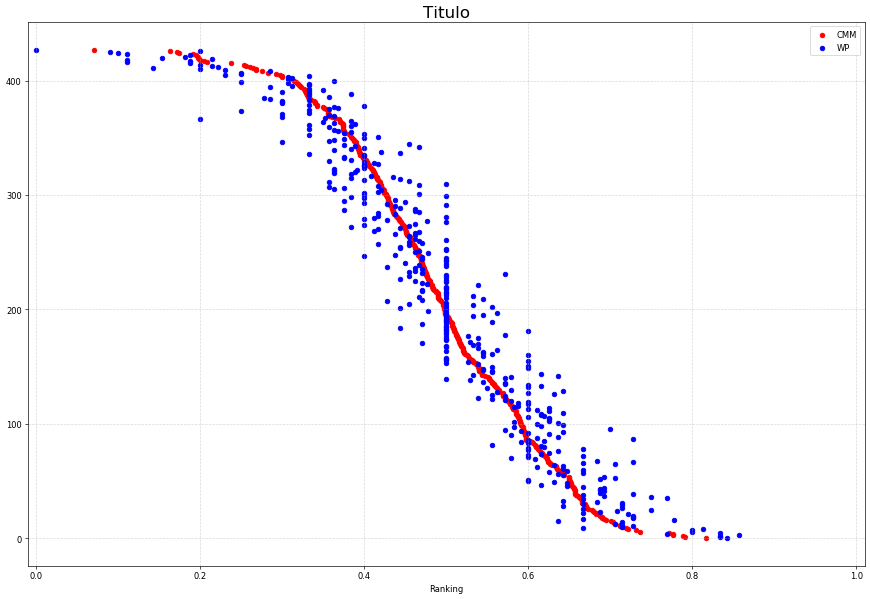

In [9]:
#Mostramos un scatter plot
rankings.reset_index(inplace=True)
showScatterRanking(rankings,'Titulo')